## Name: Shruti Deshmukh

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [56]:
# Try loading one file

df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [58]:
df.shape

(3066766, 19)

In [60]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [62]:
sampled_df = df.sample(frac=0.05)

In [64]:
sampled_df.shape

(153338, 19)

In [66]:
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2133682         2  2023-01-23 12:14:17   2023-01-23 12:32:29              2.0   
2469580         2  2023-01-26 18:50:22   2023-01-26 18:56:41              3.0   
2439017         2  2023-01-26 13:03:44   2023-01-26 13:17:59              1.0   
632557          1  2023-01-08 06:40:18   2023-01-08 06:48:04              1.0   
2551094         2  2023-01-27 13:15:18   2023-01-27 13:33:06              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2133682           9.72         1.0                  N           236   
2469580           0.63         1.0                  N           262   
2439017           2.59         1.0                  N           161   
632557            1.40         1.0                  N           234   
2551094           2.54         1.0                  N           236   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2133682           138             1         38.7    5.0      0.5       10.85   
2469580           236             1          7.2    2.5      0.5        2.00   
2439017           263             1         15.6    0.0      0.5        3.92   
632557            224             1          8.6    2.5      0.5        3.15   
2551094           161             1         18.4    0.0      0.5        4.48   

         tolls_amount  improvement_surcharge  total_amount  \
2133682          6.55                    1.0         65.10   
2469580          0.00                    1.0         15.70   
2439017          0.00                    1.0         23.52   
632557           0.00                    1.0         15.75   
2551094          0.00                    1.0         26.88   

         congestion_surcharge  airport_fee  
2133682                   2.5          0.0  
2469580                   2.5          0.0  
2439017                   2.5          0.0  
632557                    2.5          0.0  
2551094                   2.5          0.0

In [68]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.


In [110]:
# List of parquet files
files = ["yellow_tripdata_2023-12.parquet"]

for file in files:
    df = pd.read_parquet(file)  # This requires pyarrow or fastparquet installed
    csv_name = file.replace(".parquet", ".csv")
    df.to_csv(csv_name, index=False)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [112]:
import os

In [116]:
os.getcwd()

'C:\\Users\\ADMIN'

In [118]:
os.chdir('D:\\Data Science and AI study material\\graded assessment\\csvs')

In [120]:
os.getcwd()

'D:\\Data Science and AI study material\\graded assessment\\csvs'

In [122]:
os.listdir()

['yellow_tripdata_2023-01.csv',
 'yellow_tripdata_2023-02.csv',
 'yellow_tripdata_2023-03.csv',
 'yellow_tripdata_2023-04.csv',
 'yellow_tripdata_2023-05.csv',
 'yellow_tripdata_2023-06.csv',
 'yellow_tripdata_2023-07.csv',
 'yellow_tripdata_2023-08.csv',
 'yellow_tripdata_2023-09.csv',
 'yellow_tripdata_2023-10.csv',
 'yellow_tripdata_2023-11.csv',
 'yellow_tripdata_2023-12.csv']

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('D:\\Data Science and AI study material\\graded assessment\\csvs')

# Create a list of all the twelve files to read
#file_paths = os.listdir()
# Select the folder having data files
file_paths = os.listdir()
# Load all monthly data files
monthly_data = {os.path.basename(path): pd.read_csv(path) for path in file_paths}

# Parse datetime and prepare data for hourly sampling
for filename, df in monthly_data.items():
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],errors='coerce')
    df['date'] = df['tpep_pickup_datetime'].dt.date
    df['hour'] = df['tpep_pickup_datetime'].dt.hour
    monthly_data[filename] = df

# Sample 5% of data from each hour of each day
# iterate through the list of files and sample one by one:
sampled_data = []
for df in monthly_data.values():
    sampled = (
        df.groupby(['date', 'hour'], group_keys=False)
        .apply(lambda x: x.sample(frac=0.05, random_state=42) if len(x) > 0 else x)
    )
    sampled_data.append(sampled)

# Combine all sampled data into a single DataFrame
yearly_sampled_data = pd.concat(sampled_data, ignore_index=True)

# Save the combined sampled dataframe to a CSV file
output_path = "sampled_yearly_data.csv"
yearly_sampled_data.to_csv(output_path, index=False)


In [21]:
yearly_sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813739 entries, 0 to 813738
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               813739 non-null  int64         
 1   tpep_pickup_datetime   813739 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  813739 non-null  object        
 3   passenger_count        779110 non-null  float64       
 4   trip_distance          813739 non-null  float64       
 5   RatecodeID             779110 non-null  float64       
 6   store_and_fwd_flag     779110 non-null  object        
 7   PULocationID           813739 non-null  float64       
 8   DOLocationID           813739 non-null  float64       
 9   payment_type           813739 non-null  float64       
 10  fare_amount            813739 non-null  float64       
 11  extra                  813739 non-null  float64       
 12  mta_tax                813739 non-null  floa

In [789]:
yearly_sampled_data.shape

(813739, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

# Sample 250,000 rows randomly
yearly_data = yearly_sampled_data.sample(n=250000, random_state=42)

# Optionally, save the result
#yearly_data.to_csv('yearly_data.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [794]:
# Load the new data file
yearly_data.shape


(250000, 22)

In [798]:
# df.head()
yearly_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
514720         1  2023-11-07 10:08:37   2023-11-07 10:29:02              1.0   
260590         2  2023-09-20 07:25:13   2023-09-20 07:38:15              1.0   
135691         2  2023-08-26 16:30:50   2023-08-26 17:20:08              1.0   
149678         2  2023-08-29 21:52:29   2023-08-29 22:04:09              2.0   
80250          2  2023-08-14 11:44:32   2023-08-14 11:49:55              6.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
514720           2.40         1.0                  N         170.0   
260590           2.22         1.0                  N          24.0   
135691           6.68         1.0                  N         142.0   
149678           2.07         1.0                  N         230.0   
80250            0.56         1.0                  N         164.0   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
514720         141.0           1.0  ...      0.5        1.50           0.0   
260590         236.0           1.0  ...      0.5        1.00           0.0   
135691         129.0           1.0  ...      0.5       12.25           0.0   
149678         263.0           2.0  ...      0.5        0.00           0.0   
80250          170.0           1.0  ...      0.5        2.10           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
514720                    1.0         24.60                   2.5   
260590                    1.0         19.20                   2.5   
135691                    1.0         61.25                   2.5   
149678                    1.0         18.50                   2.5   
80250                     1.0         12.60                   2.5   

        airport_fee        date  hour Airport_fee  
514720          NaN  2023-11-07  10.0         0.0  
260590          NaN  2023-09-20   7.0         0.0  
135691          NaN  2023-08-26  16.0         0.0  
149678          NaN  2023-08-29  21.0         0.0  
80250           NaN  2023-08-14  11.0         0.0  

[5 rows x 22 columns]

In [800]:
# df.info()
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 514720 to 549873
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               250000 non-null  int64         
 1   tpep_pickup_datetime   250000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  250000 non-null  object        
 3   passenger_count        239481 non-null  float64       
 4   trip_distance          250000 non-null  float64       
 5   RatecodeID             239481 non-null  float64       
 6   store_and_fwd_flag     239481 non-null  object        
 7   PULocationID           250000 non-null  float64       
 8   DOLocationID           250000 non-null  float64       
 9   payment_type           250000 non-null  float64       
 10  fare_amount            250000 non-null  float64       
 11  extra                  250000 non-null  float64       
 12  mta_tax                250000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [802]:
# Fix the index and drop any columns that are not needed
yearly_data.drop(columns=['store_and_fwd_flag'], inplace=True)
yearly_data.reset_index(drop=True, inplace=True)


In [805]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               250000 non-null  int64         
 1   tpep_pickup_datetime   250000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  250000 non-null  object        
 3   passenger_count        239481 non-null  float64       
 4   trip_distance          250000 non-null  float64       
 5   RatecodeID             239481 non-null  float64       
 6   PULocationID           250000 non-null  float64       
 7   DOLocationID           250000 non-null  float64       
 8   payment_type           250000 non-null  float64       
 9   fare_amount            250000 non-null  float64       
 10  extra                  250000 non-null  float64       
 11  mta_tax                250000 non-null  float64       
 12  tip_amount             250000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [807]:
# Combine the two airport fee columns

if 'airport_fee' in yearly_data.columns and 'Airport_fee' in yearly_data.columns:
    yearly_data['Airport_fee'] = yearly_data['airport_fee'].fillna(0) + yearly_data['Airport_fee'].fillna(0)
    yearly_data.drop(columns=['airport_fee'], inplace=True)


In [809]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               250000 non-null  int64         
 1   tpep_pickup_datetime   250000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  250000 non-null  object        
 3   passenger_count        239481 non-null  float64       
 4   trip_distance          250000 non-null  float64       
 5   RatecodeID             239481 non-null  float64       
 6   PULocationID           250000 non-null  float64       
 7   DOLocationID           250000 non-null  float64       
 8   payment_type           250000 non-null  float64       
 9   fare_amount            250000 non-null  float64       
 10  extra                  250000 non-null  float64       
 11  mta_tax                250000 non-null  float64       
 12  tip_amount             250000 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [811]:
# check where values of fare amount are negative
negative_fare_df = yearly_data[yearly_data['fare_amount'] < 0]


In [813]:
negative_fare_df.count()

VendorID                 2705
tpep_pickup_datetime     2705
tpep_dropoff_datetime    2705
passenger_count          2639
trip_distance            2705
RatecodeID               2639
PULocationID             2705
DOLocationID             2705
payment_type             2705
fare_amount              2705
extra                    2705
mta_tax                  2705
tip_amount               2705
tolls_amount             2705
improvement_surcharge    2705
total_amount             2705
congestion_surcharge     2639
date                     2705
hour                     2705
Airport_fee              2705
dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [815]:
# Analyse RatecodeID for the negative fare amounts

ratecodeID_analysis = negative_fare_df['RatecodeID'].value_counts().reset_index()
ratecodeID_analysis.columns = ['RatecodeID', 'Count']

In [817]:
ratecodeID_analysis

RatecodeID  Count
0         1.0   2334
1         2.0    190
2         5.0     67
3         3.0     35
4         4.0     13

In [819]:
ratecodeID_analysis.describe()

RatecodeID        Count
count    5.000000     5.000000
mean     3.000000   527.800000
std      1.581139  1012.012203
min      1.000000    13.000000
25%      2.000000    35.000000
50%      3.000000    67.000000
75%      4.000000   190.000000
max      5.000000  2334.000000

In [821]:
# Find which columns have negative values

negative_columns = yearly_data.select_dtypes(include=['number']).columns[(yearly_data.select_dtypes(include=['number']) < 0).any()].tolist()

negative_summary = {
    "Columns with Negative Values": negative_columns
}

In [823]:
negative_summary

{'Columns with Negative Values': ['fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge',
  'Airport_fee']}

In [825]:
negative_columns

['fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [827]:
# fix these negative values

for column in negative_columns:
    yearly_data[column] = yearly_data[column].apply(lambda x: max(x, 0))

In [829]:
#to check if negative values are removed

negative_columns = yearly_data.select_dtypes(include=['number']).columns[(yearly_data.select_dtypes(include=['number']) < 0).any()].tolist()


In [831]:
negative_columns

[]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [833]:
# Find the proportion of missing values in each column

#yearly_data.info()
missing_value_proportion = yearly_data.isnull().mean().reset_index()
missing_value_proportion.columns = ['Column', 'Proportion Missing']

In [835]:
missing_value_proportion

Column  Proportion Missing
0                VendorID            0.000000
1    tpep_pickup_datetime            0.000000
2   tpep_dropoff_datetime            0.000000
3         passenger_count            0.042076
4           trip_distance            0.000000
5              RatecodeID            0.042076
6            PULocationID            0.000000
7            DOLocationID            0.000000
8            payment_type            0.000000
9             fare_amount            0.000000
10                  extra            0.000000
11                mta_tax            0.000000
12             tip_amount            0.000000
13           tolls_amount            0.000000
14  improvement_surcharge            0.000000
15           total_amount            0.000000
16   congestion_surcharge            0.042076
17                   date            0.000000
18                   hour            0.000000
19            Airport_fee            0.000000

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [837]:
# Display the rows with null values

rows_with_nulls = yearly_data[yearly_data.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
#yearly_data['passenger_count'] = yearly_data['passenger_count'].fillna(value=np.nan)

median_passenger_count = yearly_data.loc[yearly_data['passenger_count'] > 0, 'passenger_count'].median()
yearly_data['passenger_count'].fillna(median_passenger_count, inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [839]:
# Check how many rows have passenger_count as 0
zero_passenger_count = yearly_data[yearly_data['passenger_count'] == 0]


In [845]:
zero_passenger_count.count()

VendorID                 3444
tpep_pickup_datetime     3444
tpep_dropoff_datetime    3444
passenger_count          3444
trip_distance            3444
RatecodeID               3444
PULocationID             3444
DOLocationID             3444
payment_type             3444
fare_amount              3444
extra                    3444
mta_tax                  3444
tip_amount               3444
tolls_amount             3444
improvement_surcharge    3444
total_amount             3444
congestion_surcharge     3444
date                     3444
hour                     3444
Airport_fee              3444
dtype: int64

In [847]:
# Replace 0 in 'passenger_count' with the median of non-zero values

yearly_data['passenger_count'] = yearly_data['passenger_count'].apply(lambda x: median_passenger_count if x == 0 else x)


In [849]:
zero_passenger_count = yearly_data[yearly_data['passenger_count'] == 0]
zero_passenger_count.size

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [851]:
# Fix missing values in 'RatecodeID'
#find common ratecode
common_ratecode = yearly_data['RatecodeID'].mode()[0]
yearly_data['RatecodeID'] = yearly_data['RatecodeID'].fillna(common_ratecode)

In [853]:
#check the missing value

yearly_data.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10519
date                         0
hour                         0
Airport_fee                  0
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [855]:
# handle null values in congestion_surcharge

#find median to replace null value
median_congestion_surcharge_count = yearly_data['congestion_surcharge'].median()

yearly_data['congestion_surcharge'].fillna(median_congestion_surcharge_count, inplace=True)

In [857]:
yearly_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [859]:
# Handle any remaining missing values

#There are no other missing values to be handled

nan_counts = yearly_data.isna().sum()
print(nan_counts)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [861]:
# Describe the data and check if there are any potential outliers present

description = yearly_data.describe()

outliers = {}
for col in yearly_data.select_dtypes(include='number').columns:
    Q1 = yearly_data[col].quantile(0.25)
    Q3 = yearly_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = yearly_data[(yearly_data[col] < lower_bound) | (yearly_data[col] > upper_bound)].shape[0]
    print(col , outlier_count)
    outliers[col] = outlier_count

# Convert outliers dictionary to DataFrame for display
outliers_df = pd.DataFrame(list(outliers.items()), columns=["Column", "Outlier Count"])



VendorID 38
passenger_count 56038
trip_distance 33184
RatecodeID 14100
PULocationID 0
DOLocationID 0
payment_type 56533
fare_amount 25220
extra 4369
mta_tax 5261
tip_amount 18923
tolls_amount 20203
improvement_surcharge 2851
total_amount 28460
congestion_surcharge 20894
hour 0
Airport_fee 21476


In [863]:
# Check for potential out of place values in various columns

column_checks = {}

# Function to get value counts (limited to top 10 for brevity)
def get_value_summary(series):
    return series.value_counts(dropna=False).head(10)

columns_to_check = [
    'VendorID', 'passenger_count','trip_distance', 'RatecodeID', 'payment_type','fare_amount',
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'
]

for col in columns_to_check:
    column_checks[col] = get_value_summary(yearly_data[col])

# Display the summary in a readable format
summary_frames = [pd.DataFrame({col: column_checks[col]}) for col in column_checks]
summary_combined = pd.concat(summary_frames, axis=1)


In [865]:
summary_combined.head()

VendorID  passenger_count  trip_distance  RatecodeID  payment_type  \
2.0  185031.0          36765.0            NaN      9522.0       40683.0   
1.0   64931.0         193962.0         3270.0    235900.0      193467.0   
6.0      38.0           1972.0            NaN         NaN           NaN   
3.0       NaN           8939.0            NaN       806.0        1642.0   
4.0       NaN           5359.0            NaN       537.0        3689.0   

     fare_amount    extra  mta_tax  tip_amount  tolls_amount  \
2.0          NaN      NaN      NaN     11910.0           NaN   
1.0          NaN  47469.0      NaN      9179.0           NaN   
6.0          NaN   2057.0      NaN         NaN           NaN   
3.0          NaN      NaN      NaN      6561.0           NaN   
4.0          NaN      NaN      NaN      2835.0           NaN   

     improvement_surcharge  congestion_surcharge  Airport_fee  
2.0                    NaN                   NaN          NaN  
1.0               247149.0                   NaN          NaN  
6.0                    NaN                   NaN          NaN  
3.0                    NaN                   NaN          NaN  
4.0                    NaN                   NaN          NaN

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [867]:
# remove passenger_count > 6

yearly_data = yearly_data[yearly_data['passenger_count'] <= 6]

In [881]:
#check the data for passenger

yearly_data['passenger_count'].describe()

count    249999.000000
mean          1.370353
std           0.857427
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

In [871]:
numeric_cols = yearly_data.select_dtypes(include='number').columns
numeric_cols

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'hour', 'Airport_fee'],
      dtype='object')

In [883]:
# Continue with outlier handling

# Handle outliers using the IQR method for numeric columns (except IDs and categorical fields)
numeric_cols = yearly_data.select_dtypes(include='number').columns

# Exclude likely categorical or identifier columns from outlier treatment
exclude_cols = ['VendorID','passenger_count', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']
outlier_cols = [col for col in numeric_cols if col not in exclude_cols]

# Apply IQR-based filtering to remove rows with outliers
for col in outlier_cols:
    Q1 = yearly_data[col].quantile(0.25)
    Q3 = yearly_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    yearly_data = yearly_data[(yearly_data[col] >= lower_bound) & (yearly_data[col] <= upper_bound)]
    print(col)

trip_distance
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
hour
Airport_fee


In [885]:
yearly_data['passenger_count'].describe()

count    195480.000000
mean          1.360241
std           0.854005
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

In [887]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

cols_to_standardize = [col for col in numeric_cols if col not in exclude_cols]

# Check variance and ranges to decide if standardization is needed
summary_stats = yearly_data[cols_to_standardize].agg(['mean', 'std', 'min', 'max']).T
summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Column'}, inplace=True)

#import ace_tools as tools;
#tools.display_dataframe_to_user(name="Standardization Candidates", dataframe=summary_stats)


In [889]:
summary_stats.head()

Column       mean       std  min    max
0  trip_distance   1.764181  1.168389  0.0   6.87
1    fare_amount  13.469565  6.030019  0.0  33.07
2          extra   1.341714  1.434156  0.0   6.00
3        mta_tax   0.500000  0.000000  0.5   0.50
4     tip_amount   2.572941  1.860476  0.0   8.30

In [891]:
scaler = StandardScaler()
yearly_data_standardized = yearly_data.copy()

# Apply standardization to the selected columns
yearly_data_standardized[cols_to_standardize] = scaler.fit_transform(yearly_data_standardized[cols_to_standardize])

In [893]:
yearly_data_standardized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195480 entries, 0 to 249996
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               195480 non-null  int64         
 1   tpep_pickup_datetime   195480 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  195480 non-null  object        
 3   passenger_count        195480 non-null  float64       
 4   trip_distance          195480 non-null  float64       
 5   RatecodeID             195480 non-null  float64       
 6   PULocationID           195480 non-null  float64       
 7   DOLocationID           195480 non-null  float64       
 8   payment_type           195480 non-null  float64       
 9   fare_amount            195480 non-null  float64       
 10  extra                  195480 non-null  float64       
 11  mta_tax                195480 non-null  float64       
 12  tip_amount             195480 non-null  float64  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [895]:
yearly_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical Variables
* `tpep_pickup_datetime`: Categorical Variables
* `tpep_dropoff_datetime`: Categorical Variables
* `passenger_count`: Numerical Variables
* `trip_distance`: Numerical Variables
* `RatecodeID`: Categorical Variables
* `PULocationID`: Categorical Variables
* `DOLocationID`: Categorical Variables
* `payment_type`: Categorical Variables
* `pickup_hour`: Numerical Variables
* `trip_duration`: Numerical Variables


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#### Answer : The above fields comes under numerical category

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

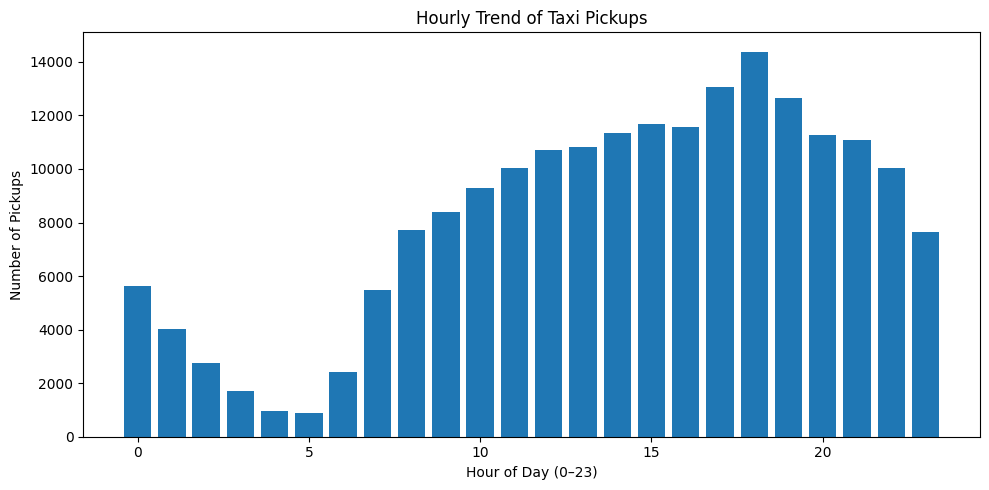

In [897]:
# Find and show the hourly trends in taxi pickups
# Convert pickup datetime and extract hour
yearly_data['tpep_pickup_datetime'] = pd.to_datetime(yearly_data['tpep_pickup_datetime'], errors='coerce')
yearly_data['pickup_hour'] = yearly_data['tpep_pickup_datetime'].dt.hour

# Group and count pickups by hour
hourly_pickups = yearly_data['pickup_hour'].value_counts().sort_index()

# Plot the hourly trend
plt.figure(figsize=(10, 5))
#plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o')
plt.bar(hourly_pickups.index, hourly_pickups.values)
plt.title("Hourly Trend of Taxi Pickups")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
#plt.grid(True)
#plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


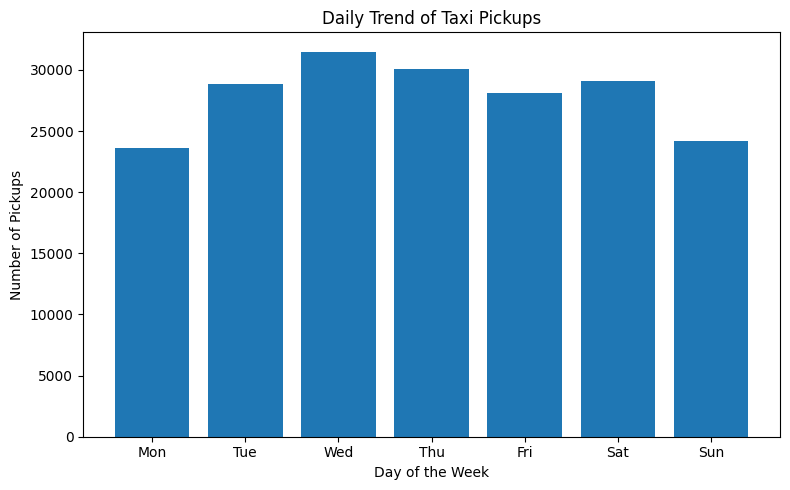

In [971]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of the week from the pickup datetime
# 0 = Monday, 6 = Sunday
yearly_data['pickup_day'] = yearly_data['tpep_pickup_datetime'].dt.dayofweek

# Map day numbers to names
day_name_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}
yearly_data['pickup_day_name'] = yearly_data['pickup_day'].map(day_name_map)

# Group and count pickups by day of week
daily_pickups = yearly_data['pickup_day_name'].value_counts().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot the daily trend
plt.figure(figsize=(8, 5))
plt.bar(daily_pickups.index, daily_pickups.values)
plt.title("Daily Trend of Taxi Pickups")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
#plt.grid(axis='y')
plt.tight_layout()
plt.show()

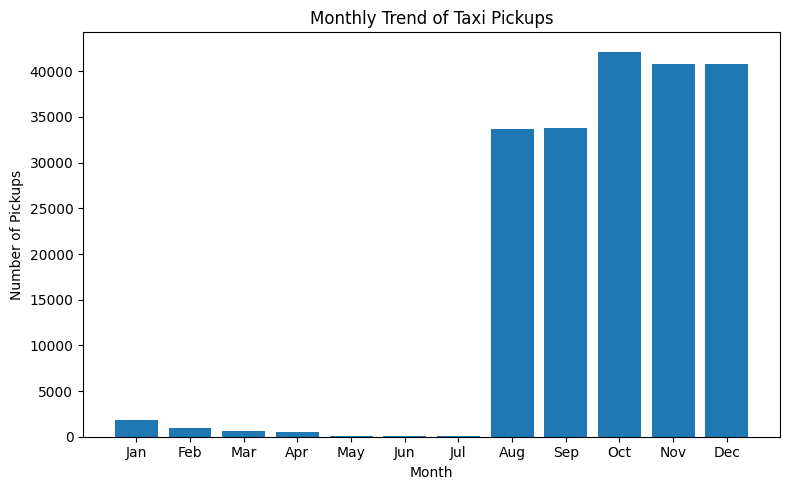

In [973]:
# Show the monthly trends in pickups

yearly_data['pickup_month'] = yearly_data['tpep_pickup_datetime'].dt.month

# Map day numbers to names
month_name_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
yearly_data['pickup_month_name'] = yearly_data['pickup_month'].map(month_name_map)

# Group and count pickups by day of week
monthly_pickups = yearly_data['pickup_month_name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr',
     'May', 'Jun', 'Jul', 'Aug',
     'Sep',  'Oct', 'Nov',  'Dec'])

# Plot the daily trend
plt.figure(figsize=(8, 5))
plt.bar(monthly_pickups.index, monthly_pickups.values)
plt.title("Monthly Trend of Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
#plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [975]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151724 entries, 0 to 151805
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151724 non-null  int64         
 1   tpep_pickup_datetime   151724 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  151724 non-null  datetime64[ns]
 3   passenger_count        151724 non-null  float64       
 4   trip_distance          151724 non-null  float64       
 5   RatecodeID             151724 non-null  float64       
 6   PULocationID           151724 non-null  float64       
 7   DOLocationID           151724 non-null  float64       
 8   payment_type           151724 non-null  float64       
 9   fare_amount            151724 non-null  float64       
 10  extra                  151724 non-null  float64       
 11  mta_tax                151724 non-null  float64       
 12  tip_amount             151724 non-null  float64  

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [977]:
# Analyse the above parameters

# Check financial columns and trip_distance for zero or negative values
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a summary of zero and negative value counts
zero_negative_summary = {
    col: {
        'Zero Count': (yearly_data[col] == 0).sum(),
        'Negative Count': (yearly_data[col] < 0).sum()
    }
    for col in financial_cols
}

# Convert summary to DataFrame for display
zero_negative_df = pd.DataFrame(zero_negative_summary).T.reset_index()
zero_negative_df.columns = ['Column', 'Zero Count', 'Negative Count']

In [979]:
zero_negative_df.head()

Column  Zero Count  Negative Count
0    fare_amount          71               0
1     tip_amount       43128               0
2   total_amount           0               0
3  trip_distance        4232               0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [981]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = yearly_data[
    (yearly_data['fare_amount'] > 0) &
    (yearly_data['tip_amount'] > 0) &
    (yearly_data['total_amount'] > 0) &
    (yearly_data['trip_distance'] > 0)
]

In [982]:
non_zero_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-11-07 10:08:37   2023-11-07 10:29:02              1.0   
1              2  2023-09-20 07:25:13   2023-09-20 07:38:15              1.0   
4              2  2023-08-14 11:44:32   2023-08-14 11:49:55              6.0   
6              2  2023-10-23 18:51:43   2023-10-23 18:59:51              1.0   
7              2  2023-11-11 16:44:01   2023-11-11 17:05:32              3.0   
...          ...                  ...                   ...              ...   
249988         2  2023-08-08 13:08:11   2023-08-08 13:16:08              1.0   
249989         2  2023-10-20 10:36:20   2023-10-20 10:52:24              1.0   
249990         2  2023-12-04 13:29:56   2023-12-04 13:47:02              1.0   
249994         2  2023-08-10 15:41:45   2023-08-10 15:51:30              1.0   
249995         2  2023-12-02 19:17:33   2023-12-02 19:32:45              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                2.40         1.0         170.0         141.0           1.0   
1                2.22         1.0          24.0         236.0           1.0   
4                0.56         1.0         164.0         170.0           1.0   
6                0.78         1.0         261.0          88.0           1.0   
7                1.29         1.0         246.0          48.0           1.0   
...               ...         ...           ...           ...           ...   
249988           0.75         1.0         211.0         231.0           1.0   
249989           2.00         1.0          43.0         237.0           1.0   
249990           1.64         1.0          68.0          48.0           1.0   
249994           1.44         1.0         142.0         238.0           1.0   
249995           1.91         1.0         158.0          68.0           1.0   

        fare_amount  ...  total_amount  congestion_surcharge        date  \
0              19.1  ...         24.60                   2.5  2023-11-07   
1              14.2  ...         19.20                   2.5  2023-09-20   
4               6.5  ...         12.60                   2.5  2023-08-14   
6               8.6  ...         18.12                   2.5  2023-10-23   
7              18.4  ...         26.88                   2.5  2023-11-11   
...             ...  ...           ...                   ...         ...   
249988          8.6  ...         15.12                   2.5  2023-08-08   
249989         16.3  ...         25.38                   2.5  2023-10-20   
249990         16.3  ...         20.35                   2.5  2023-12-04   
249994         10.7  ...         17.70                   2.5  2023-08-10   
249995         14.9  ...         19.90                   2.5  2023-12-02   

        hour  Airport_fee  pickup_hour  pickup_month pickup_month_name  \
0       10.0          0.0           10            11               Nov   
1        7.0          0.0            7             9               Sep   
4       11.0          0.0           11             8               Aug   
6       18.0          0.0           18            10               Oct   
7       16.0          0.0           16            11               Nov   
...      ...          ...          ...           ...               ...   
249988  13.0          0.0           13             8               Aug   
249989  10.0          0.0           10            10               Oct   
249990  13.0          0.0           13            12               Dec   
249994  15.0          0.0           15             8               Aug   
249995  19.0          0.0           19            12               Dec   

        pickup_day  pickup_day_name  
0                1              Tue  
1                2              Wed  
4                0              Mon  
6                0              Mon  
7                5              Sat  
...            ...              ...  
249988           1            

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

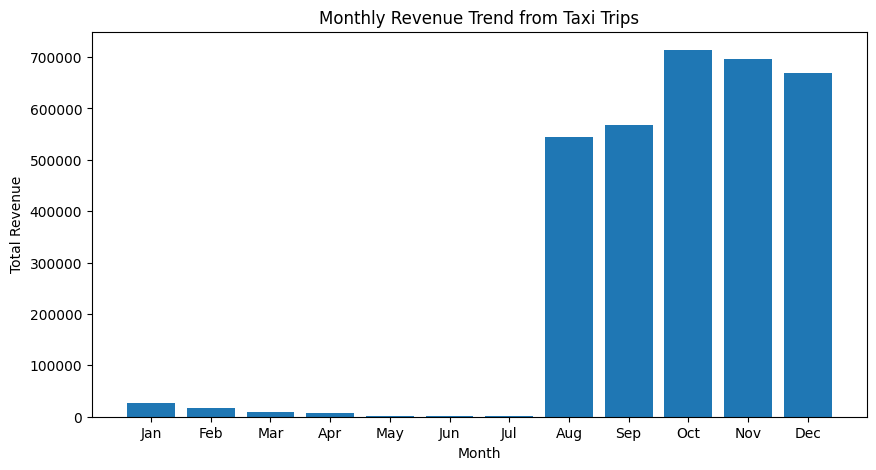

In [985]:
# Group data by month and analyse monthly revenue

# Ensure pickup_month is datetime-based for grouping
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'], errors='coerce')
non_zero_df['pickup_month'] = non_zero_df['tpep_pickup_datetime'].dt.month

# Map day numbers to names
month_name_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

yearly_data['pickup_month_name'] = yearly_data['pickup_month'].map(month_name_map)

# Group by pickup_month and sum total_amount for revenue
monthly_revenue = non_zero_df.groupby('pickup_month_name')['total_amount'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr',
     'May', 'Jun', 'Jul', 'Aug',
     'Sep',  'Oct', 'Nov',  'Dec'])

plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.title("Monthly Revenue Trend from Taxi Trips")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

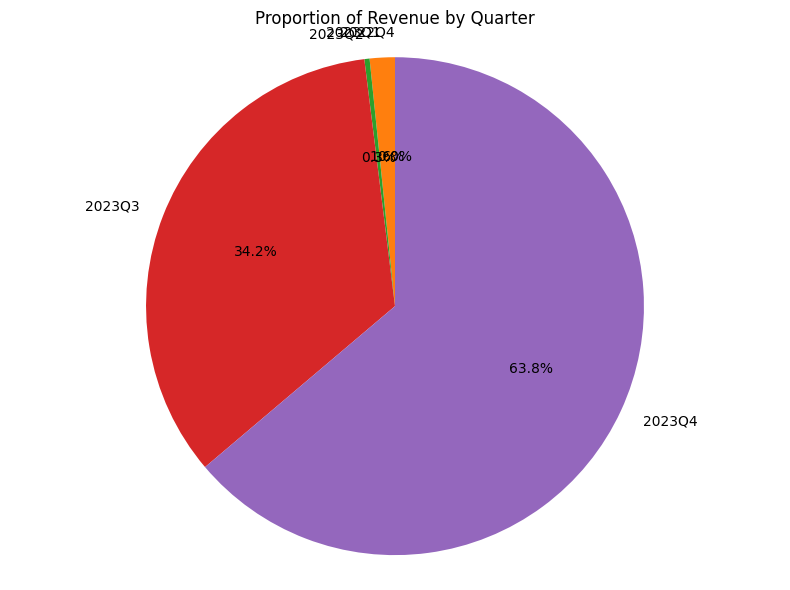

In [987]:
# Calculate proportion of each quarter

non_zero_df['quarter'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum total revenue
quarterly_revenue = non_zero_df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Total Revenue']

# Convert to string for display
quarterly_revenue['Quarter'] = quarterly_revenue['Quarter'].astype(str)

# Plot as pie chart
plt.figure(figsize=(8,6))
plt.pie(quarterly_revenue['Total Revenue'], labels=quarterly_revenue['Quarter'], autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Revenue by Quarter")
plt.axis('equal')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

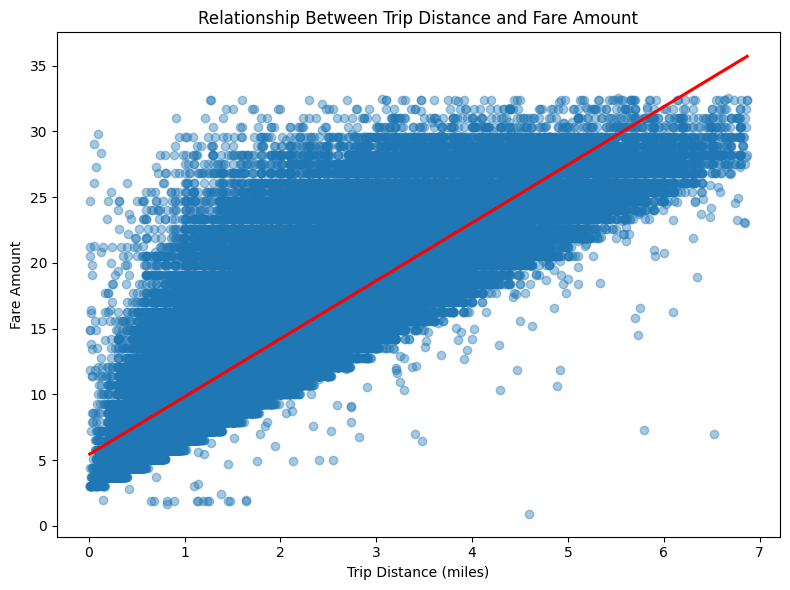

0.8511499711664874

In [989]:
# Show how trip fare is affected by distance

# Scatter plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(data=non_zero_df, x='trip_distance', y='fare_amount', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")
plt.tight_layout()
plt.show()

# Compute correlation
correlation = non_zero_df[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
correlation

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

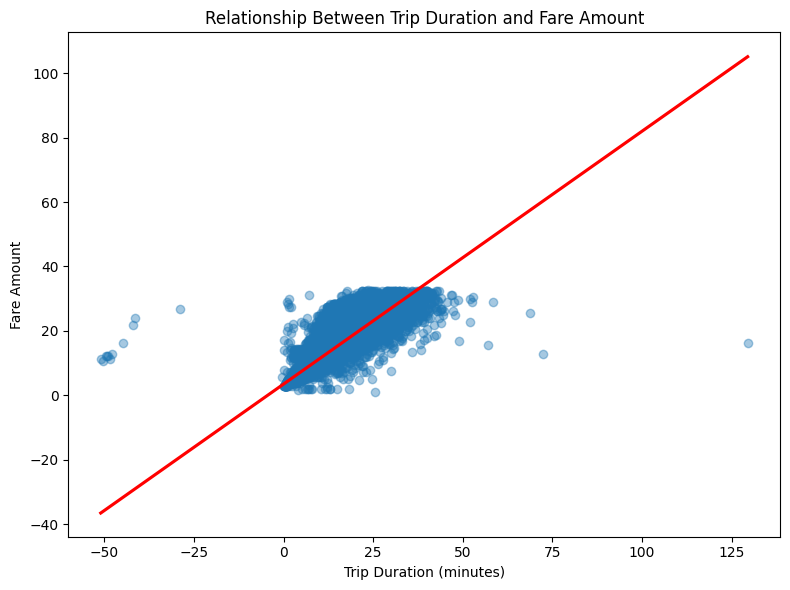

0.935664106048302

In [995]:
# Show relationship between fare and trip duration

non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'], errors='coerce')
non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
non_zero_df['trip_duration'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out extreme outliers for cleaner visualization (trip duration > 3 hours)
duration_filtered = non_zero_df[non_zero_df['trip_duration'] <= 180]

# Plot the relationship
plt.figure(figsize=(8, 6))
sns.regplot(data=duration_filtered, x='trip_duration', y='fare_amount', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.tight_layout()
plt.show()

# Compute correlation
correlation_duration = duration_filtered[['trip_duration', 'fare_amount']].corr().iloc[0, 1]
correlation_duration

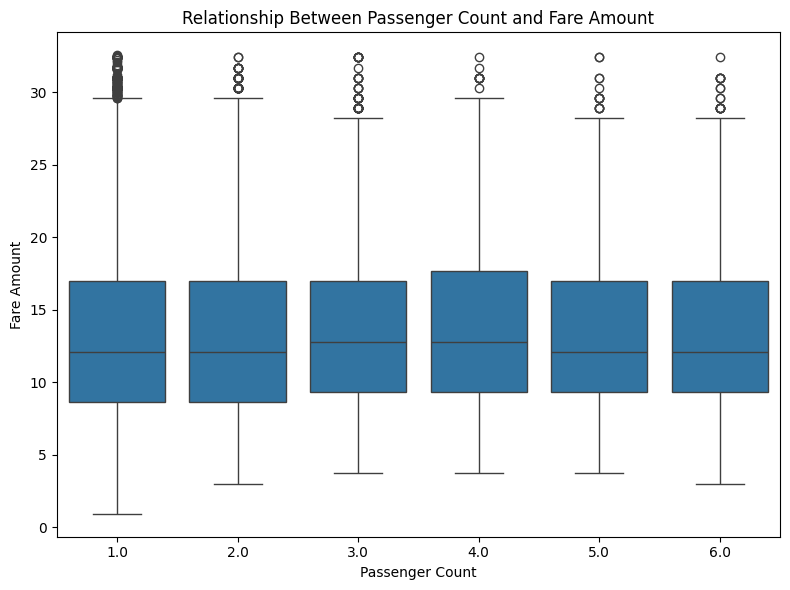

0.013154439618636224

In [997]:
# Show relationship between fare and number of passengers

# Plot the relationship between number of passengers and fare amount
plt.figure(figsize=(8, 6))
sns.boxplot(data=non_zero_df, x='passenger_count', y='fare_amount')
plt.title("Relationship Between Passenger Count and Fare Amount")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.tight_layout()
plt.show()

# Calculate correlation (though not very meaningful for discrete variables like passenger count)
correlation_passenger_fare = non_zero_df[['passenger_count', 'fare_amount']].corr().iloc[0, 1]
correlation_passenger_fare

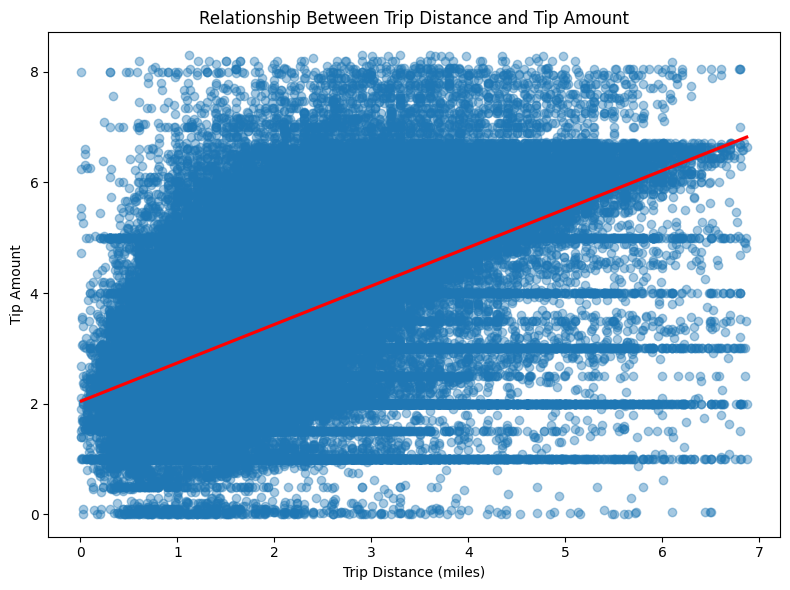

0.5475390707661693

In [999]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 6))
sns.regplot(data=non_zero_df, x='trip_distance', y='tip_amount', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title("Relationship Between Trip Distance and Tip Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount")
plt.tight_layout()
plt.show()

# Compute correlation
correlation_tip_distance = non_zero_df[['trip_distance', 'tip_amount']].corr().iloc[0, 1]
correlation_tip_distance

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [1001]:
# Analyse the distribution of different payment types (payment_type).

# Map payment_type codes to labels
payment_map = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}
non_zero_df['payment_type_label'] = non_zero_df['payment_type']

# Count occurrences of each payment type
payment_distribution = non_zero_df['payment_type_label'].value_counts().reset_index()
payment_distribution.columns = ['Payment Type', 'Count']

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_distribution, x='Payment Type', y='Count')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()



In [1003]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151806 entries, 0 to 249995
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151806 non-null  int64         
 1   tpep_pickup_datetime   151806 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  151806 non-null  datetime64[ns]
 3   passenger_count        151806 non-null  float64       
 4   trip_distance          151806 non-null  float64       
 5   RatecodeID             151806 non-null  float64       
 6   PULocationID           151806 non-null  float64       
 7   DOLocationID           151806 non-null  float64       
 8   payment_type           151806 non-null  float64       
 9   fare_amount            151806 non-null  float64       
 10  extra                  151806 non-null  float64       
 11  mta_tax                151806 non-null  float64       
 12  tip_amount             151806 non-null  float64  

In [1005]:
non_zero_df['payment_type'].describe()

count    151806.000000
mean          0.978413
std           0.146009
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: payment_type, dtype: float64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [543]:
!pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.2 MB 11.2 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/16.2 MB 11.2 MB/s eta 0:00:02
   ----------------- ---------------------- 7.1/16.2 MB 11.5 MB/s eta 0:00:01
   ----------------------- ---------------- 9.4/16.2 MB 11.3 MB/s eta 0:00:01
   ----------------------------- ---------- 12.1/16.2 MB 11.4 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.2 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.3 MB 11.8 MB/s eta 0:00:01
   ---------------------------- ----------- 4.5/6.3 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1007]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [1009]:
print(zones.info())
zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1011]:
# Merge zones and trip records using locationID and PULocationID

non_zero_df = non_zero_df.merge(zones[['OBJECTID','Shape_Leng','Shape_Area','LocationID', 'zone', 'borough','geometry']],
                                left_on='PULocationID',
                                right_on='LocationID',
                                how='left')

# Merge for drop-off zone
#filtered_df = filtered_df.merge(zones_df[['LocationID', 'zone', 'borough']],
#                                left_on='DOLocationID',
#                                right_on='LocationID',
#                                how='left')
#filtered_df.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)
#filtered_df.drop(columns=['LocationID'], inplace=True)

In [1013]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151806 entries, 0 to 151805
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151806 non-null  int64         
 1   tpep_pickup_datetime   151806 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  151806 non-null  datetime64[ns]
 3   passenger_count        151806 non-null  float64       
 4   trip_distance          151806 non-null  float64       
 5   RatecodeID             151806 non-null  float64       
 6   PULocationID           151806 non-null  float64       
 7   DOLocationID           151806 non-null  float64       
 8   payment_type           151806 non-null  float64       
 9   fare_amount            151806 non-null  float64       
 10  extra                  151806 non-null  float64       
 11  mta_tax                151806 non-null  float64       
 12  tip_amount             151806 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1015]:
# Group data by location and calculate the number of trips

pickup_counts = non_zero_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup Trip Count']

dropoff_counts = non_zero_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff Trip Count']

# Merge both counts on LocationID
location_trip_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
location_trip_counts['Total Trips'] = location_trip_counts['Pickup Trip Count'] + location_trip_counts['Dropoff Trip Count']

# Merge with zone names from zone dataset
location_trip_summary = location_trip_counts.merge(zones[['OBJECTID','Shape_Leng','Shape_Area','LocationID', 'zone', 'borough','geometry']], on='LocationID', how='left')



In [1017]:
location_trip_summary.head()

LocationID  Pickup Trip Count  Dropoff Trip Count  Total Trips  OBJECTID  \
0         4.0              188.0               570.0        758.0       4.0   
1         7.0               19.0               183.0        202.0       7.0   
2         8.0                0.0                 1.0          1.0       8.0   
3        11.0                1.0                 0.0          1.0      11.0   
4        12.0               46.0                74.0        120.0      12.0   

   Shape_Leng  Shape_Area           zone    borough  \
0    0.043567    0.000112  Alphabet City  Manhattan   
1    0.107417    0.000390        Astoria     Queens   
2    0.027591    0.000027   Astoria Park     Queens   
3    0.079211    0.000265     Bath Beach   Brooklyn   
4    0.036661    0.000042   Battery Park  Manhattan   

                                            geometry  
0  POLYGON ((992073.467 203714.076, 992068.667 20...  
1  POLYGON ((1010804.218 218919.641, 1011049.165 ...  
2  POLYGON ((1005482.276 221686.466, 1005304.898 ...  
3  POLYGON ((983945.076 158978.174, 984160.158 15...  
4  POLYGON ((979908.772 196066.565, 979980.852 19...

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1019]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_trip_summary[['LocationID', 'Total Trips']], on='LocationID', how='left')

# Fill any missing trip counts with 0
zones['Total Trips'] = zones_with_trips['Total Trips'].fillna(0)


In [1021]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   Total Trips  263 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

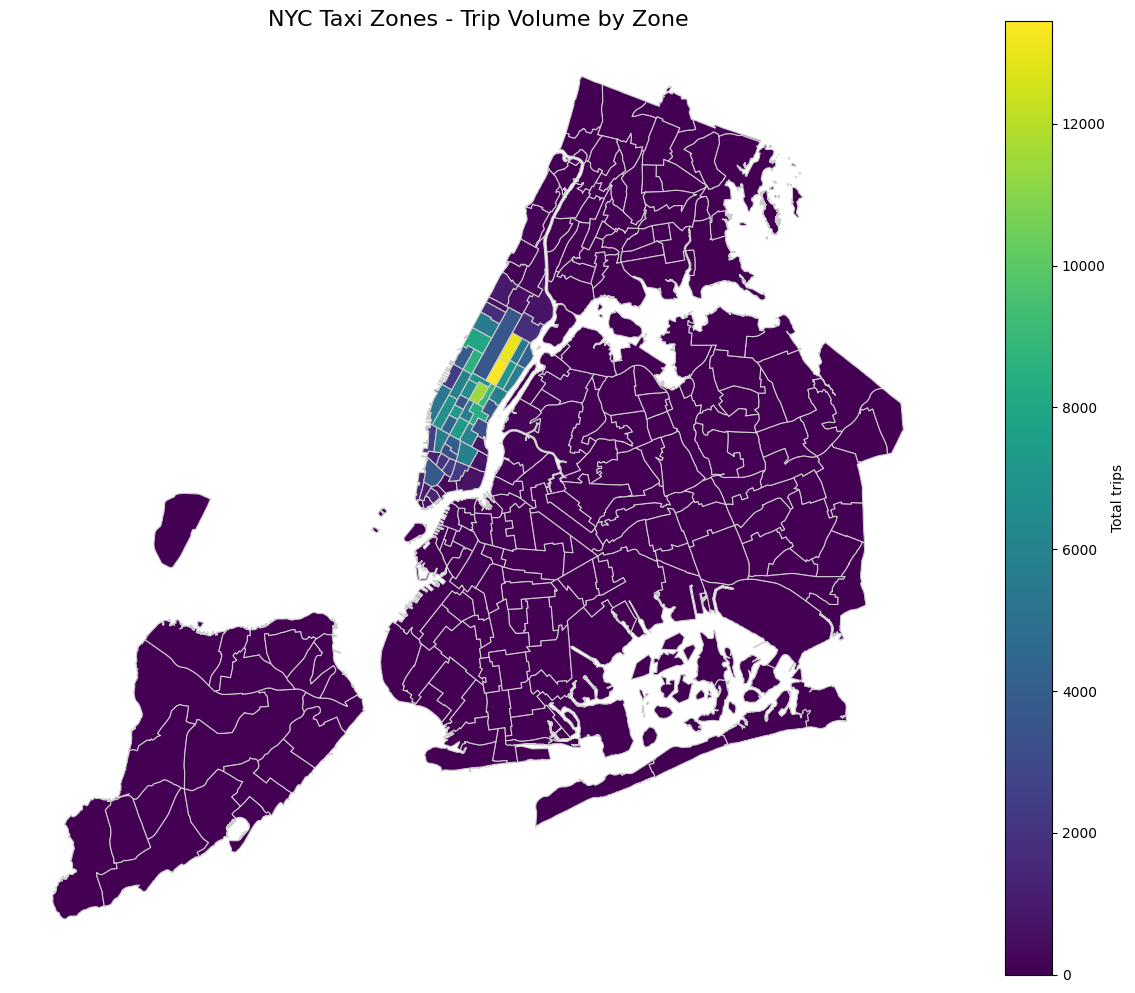

In [1025]:

# Define figure and axis


# Plot the map and display it

# Join trip data to full GeoDataFrame

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='Total Trips',
              cmap='viridis',
              linewidth=0.8,
              ax=ax,
              edgecolor='0.8',
              legend=True,
          legend_kwds = {'label': "Total trips", 'orientation': "vertical"})

ax.set_title("NYC Taxi Zones - Trip Volume by Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()



In [1027]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones_df = zones.sort_values(by='Total Trips', ascending=False).reset_index(drop=True)

In [1029]:
sorted_zones_df.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
0       237    0.042213    0.000096  Upper East Side South         237   
1       236    0.044252    0.000103  Upper East Side North         236   
2       161    0.035804    0.000072         Midtown Center         161   
3       162    0.035270    0.000048           Midtown East         162   
4       142    0.038176    0.000076    Lincoln Square East         142   

     borough                                           geometry  Total Trips  
0  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...      13453.0  
1  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...      13047.0  
2  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...      11450.0  
3  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...       9089.0  
4  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...       8587.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1031]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151806 entries, 0 to 151805
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151806 non-null  int64         
 1   tpep_pickup_datetime   151806 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  151806 non-null  datetime64[ns]
 3   passenger_count        151806 non-null  float64       
 4   trip_distance          151806 non-null  float64       
 5   RatecodeID             151806 non-null  float64       
 6   PULocationID           151806 non-null  float64       
 7   DOLocationID           151806 non-null  float64       
 8   payment_type           151806 non-null  float64       
 9   fare_amount            151806 non-null  float64       
 10  extra                  151806 non-null  float64       
 11  mta_tax                151806 non-null  float64       
 12  tip_amount             151806 non-null  floa

In [1033]:
# Find routes which have the slowest speeds at different times of the day

# Convert timestamps
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'], errors='coerce')
non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
non_zero_df['trip_duration_min'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract pickup hour
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Remove durations <= 0 or extreme values (> 3 hours)
non_zero_df = non_zero_df[(non_zero_df['trip_duration_min'] > 0) & (non_zero_df['trip_duration_min'] <= 180)]

# Compute route key as origin-destination
non_zero_df['route'] = non_zero_df['PULocationID'].astype(str) + '-' + non_zero_df['DOLocationID'].astype(str)

# Group by route and hour to compute average duration and distance
route_hour_stats = non_zero_df.groupby(['route', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_min': 'mean'
}).reset_index()

# Calculate speed (miles per minute)
route_hour_stats['speed_mph'] = route_hour_stats['trip_distance'] / (route_hour_stats['trip_duration_min'] / 60)

# Sort by slowest average speeds
slow_routes = route_hour_stats.sort_values(by='speed_mph').reset_index(drop=True)

In [1035]:
slow_routes.tail()

route  pickup_hour  trip_distance  trip_duration_min    speed_mph
35764    262.0-4.0            6           4.80           8.066667    35.702479
35765  262.0-137.0            5           3.21           5.300000    36.339623
35766   125.0-87.0           21           5.69           7.150000    47.748252
35767  137.0-264.0            1           2.68           0.083333  1929.600000
35768  263.0-264.0           20           1.15           0.033333  2070.000000

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [1037]:
# Visualise the number of trips per hour and find the busiest hour

# Count number of trips per hour
hourly_trip_counts = non_zero_df['pickup_hour'].value_counts().sort_index().reset_index()
hourly_trip_counts.columns = ['Hour', 'Number of Trips']

# Identify the busiest hour
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['Number of Trips'].idxmax()]

plt.figure(figsize=(10, 5))
plt.bar(hourly_trip_counts['Hour'], hourly_trip_counts['Number of Trips'])
plt.title("Number of Taxi Trips by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

busiest_hour

Hour                  18
Number of Trips    11392
Name: 18, dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1039]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151724 entries, 0 to 151805
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151724 non-null  int64         
 1   tpep_pickup_datetime   151724 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  151724 non-null  datetime64[ns]
 3   passenger_count        151724 non-null  float64       
 4   trip_distance          151724 non-null  float64       
 5   RatecodeID             151724 non-null  float64       
 6   PULocationID           151724 non-null  float64       
 7   DOLocationID           151724 non-null  float64       
 8   payment_type           151724 non-null  float64       
 9   fare_amount            151724 non-null  float64       
 10  extra                  151724 non-null  float64       
 11  mta_tax                151724 non-null  float64       
 12  tip_amount             151724 non-null  float64  

In [1041]:
# Scale up the number of trips

hourly_trip_counts = non_zero_df['pickup_hour'].value_counts().sort_index().reset_index()
hourly_trip_counts.columns = ['Hour', 'Number of Trips']

# Get top 5 busiest hours
top_5_hours = hourly_trip_counts.sort_values(by='Number of Trips', ascending=False).head(5).copy()

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10 

# Scale up number of trips
top_5_hours['Estimated Total Trips'] = top_5_hours['Number of Trips'] / sample_fraction


top_5_hours


Hour  Number of Trips  Estimated Total Trips
18    18            11392               113920.0
17    17            10273               102730.0
19    19            10054               100540.0
20    20             9084                90840.0
21    21             8918                89180.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [1043]:
# Compare traffic trends for the week days and weekends

# Split into weekday and weekend datasets
weekday_df = non_zero_df[non_zero_df['pickup_day'] < 5].copy()
weekend_df = non_zero_df[non_zero_df['pickup_day'] >= 5].copy()

# Count trips per hour for weekdays and weekends
weekday_hourly = weekday_df['pickup_hour'].value_counts().sort_index().reset_index()
weekend_hourly = weekend_df['pickup_hour'].value_counts().sort_index().reset_index()
weekday_hourly.columns = weekend_hourly.columns = ['Hour', 'Number of Trips']

# Plot comparison
import matplotlib.pyplot as plt


x = np.arange(24)  # Hours of the day
bar_width = 0.4

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, weekday_hourly['Number of Trips'],width=bar_width, label='Weekday')
plt.bar(x + bar_width/2, weekend_hourly['Number of Trips'],width=bar_width, label='Weekend')
plt.title("Hourly Traffic Pattern: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend()
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

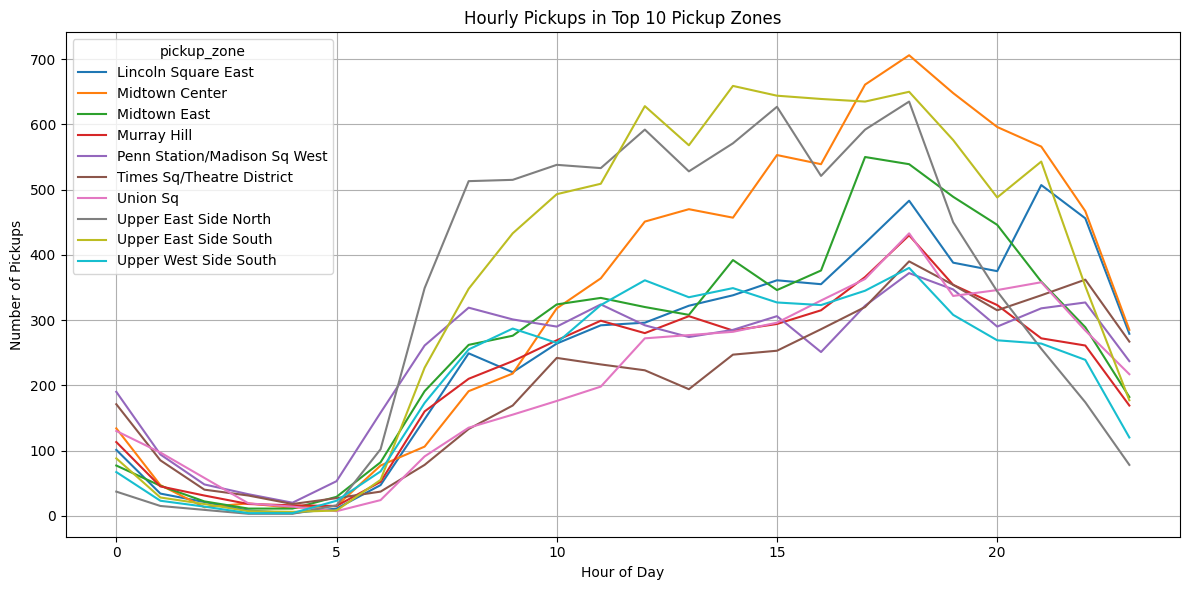

In [1085]:
# Find top 10 pickup and dropoff zones

non_zero_df = non_zero_df.merge(zones[['LocationID', 'zone']], how='left', left_on='PULocationID', right_on='LocationID')
non_zero_df.rename(columns={'zone': 'pickup_zone'}, inplace=True)

non_zero_df = non_zero_df.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')
non_zero_df.rename(columns={'zone': 'dropoff_zone'}, inplace=True)

top_pickup_zones = non_zero_df['pickup_zone'].value_counts().head(10).index.tolist()
top_dropoff_zones = non_zero_df['dropoff_zone'].value_counts().head(10).index.tolist()

# Group hourly data
pickup_hourly = non_zero_df[non_zero_df['pickup_zone'].isin(top_pickup_zones)].groupby(['pickup_hour', 'pickup_zone']).size().unstack(fill_value=0)
dropoff_hourly = non_zero_df[non_zero_df['dropoff_zone'].isin(top_dropoff_zones)].groupby(['pickup_hour', 'dropoff_zone']).size().unstack(fill_value=0)

# Plot pickups
pickup_hourly.plot(figsize=(12, 6), title="Hourly Pickups in Top 10 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot dropoffs
dropoff_hourly.plot(figsize=(12, 6), title="Hourly Dropoffs in Top 10 Dropoff Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1089]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = non_zero_df['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

dropoff_counts = non_zero_df['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Merge counts and compute ratio
zone_ratio_df = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)
zone_ratio_df['pickup_dropoff_ratio'] = zone_ratio_df['pickup_count'] / zone_ratio_df['dropoff_count'].replace(0, 1)

# Top and bottom 10 by ratio
top_10_ratios = zone_ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = zone_ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

top_10_ratios['category'] = 'Top 10'
bottom_10_ratios['category'] = 'Bottom 10'
combined_ratios = pd.concat([top_10_ratios, bottom_10_ratios], ignore_index=True)

In [1091]:
#view ratios of top10/bottom10

combined_ratios.head(20)

zone  pickup_count  dropoff_count  \
0                Flatbush/Ditmas Park           2.0            0.0   
1                       East Elmhurst           2.0            0.0   
2                         JFK Airport           2.0            1.0   
3        Penn Station/Madison Sq West        5712.0         3561.0   
4             Greenwich Village South        2446.0         1744.0   
5                        Central Park        2812.0         2079.0   
6                    Garment District        2530.0         1955.0   
7                        West Village        4089.0         3215.0   
8                        Midtown East        6261.0         5007.0   
9                      Midtown Center        7913.0         6530.0   
10  University Heights/Morris Heights           0.0            2.0   
11                       Coney Island           0.0            1.0   
12                Crown Heights South           0.0            6.0   
13                        Hunts Point           0.0            1.0   
14                  LaGuardia Airport           0.0           11.0   
15                   Sunset Park West           0.0            4.0   
16   East Concourse/Concourse Village           0.0            6.0   
17                   Sunset Park East           0.0            1.0   
18                     Queens Village           0.0            1.0   
19                      Melrose South           0.0            3.0   

    pickup_dropoff_ratio   category  
0               2.000000     Top 10  
1               2.000000     Top 10  
2               2.000000     Top 10  
3               1.604044     Top 10  
4               1.402523     Top 10  
5               1.352573     Top 10  
6               1.294118     Top 10  
7               1.271851     Top 10  
8               1.250449     Top 10  
9               1.211792     Top 10  
10              0.000000  Bottom 10  
11              0.000000  Bottom 10  
12              0.000000  Bottom 10  
13              0.000000  Bottom 10  
14              0.000000  Bottom 10  
15              0.000000  Bottom 10  
16              0.000000  Bottom 10  
17              0.000000  Bottom 10  
18              0.000000  Bottom 10  
19              0.000000  Bottom 10

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1093]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips occurring between 11PM and 5AM
night_hours = list(range(0, 6)) + [23]
night_trips = non_zero_df[non_zero_df['pickup_hour'].isin(night_hours)]

# Count pickups and dropoffs during night hours
night_pickups = night_trips['pickup_zone'].value_counts().reset_index()
night_pickups.columns = ['zone', 'night_pickup_count']

night_dropoffs = night_trips['dropoff_zone'].value_counts().reset_index()
night_dropoffs.columns = ['zone', 'night_dropoff_count']

# Merge both counts
night_traffic = pd.merge(night_pickups, night_dropoffs, on='zone', how='outer').fillna(0)

# Calculate total night traffic
night_traffic['total_night_traffic'] = night_traffic['night_pickup_count'] + night_traffic['night_dropoff_count']

# Sort by total night traffic and get top zones
top_night_zones = night_traffic.sort_values(by='total_night_traffic', ascending=False).head(20)


In [1095]:
#View top pickup and dropoff traffic during night hours (11PM to 5AM)

top_night_zones.head(20)

zone  night_pickup_count  night_dropoff_count  \
28                   East Village              1472.0                  835   
100                  West Village              1270.0                  562   
15                   Clinton East               865.0                  685   
55                Lower East Side               943.0                  402   
37                       Gramercy               587.0                  671   
24                   East Chelsea               612.0                  548   
40        Greenwich Village South               909.0                  249   
69   Penn Station/Madison Sq West               675.0                  367   
66                    Murray Hill               407.0                  619   
63                  Midtown South               612.0                  404   
87      Times Sq/Theatre District               639.0                  362   
33                       Flatiron               475.0                  487   
91                       Union Sq               542.0                  407   
50            Lincoln Square East               458.0                  371   
49                Lenox Hill West               299.0                  528   
60                 Midtown Center               525.0                  281   
52            Little Italy/NoLiTa               491.0                  311   
98      West Chelsea/Hudson Yards               426.0                  372   
107                Yorkville West               308.0                  468   
88           TriBeCa/Civic Center               354.0                  398   

     total_night_traffic  
28                2307.0  
100               1832.0  
15                1550.0  
55                1345.0  
37                1258.0  
24                1160.0  
40                1158.0  
69                1042.0  
66                1026.0  
63                1016.0  
87                1001.0  
33                 962.0  
91                 949.0  
50                 829.0  
49                 827.0  
60                 806.0  
52                 802.0  
98                 798.0  
107                776.0  
88                 752.0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [1097]:
# Filter for night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]

# Add day/night labels
non_zero_df['time_period'] = non_zero_df['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Group by time period and sum total_amount
revenue_by_period = non_zero_df.groupby('time_period')['total_amount'].sum().reset_index()
revenue_by_period.columns = ['Time Period', 'Total Revenue']

# Calculate revenue share
total_revenue = revenue_by_period['Total Revenue'].sum()
revenue_by_period['Revenue Share (%)'] = (revenue_by_period['Total Revenue'] / total_revenue) * 100

In [1099]:
#view total day and night revenue share

revenue_by_period.head()

Time Period  Total Revenue  Revenue Share (%)
0         Day     2872073.92          88.178543
1       Night      385038.10          11.821457

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1101]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile per passenger
non_zero_df['fare_per_mile_per_passenger'] = non_zero_df['fare_amount'] / (non_zero_df['trip_distance'] * non_zero_df['passenger_count'])

# Filter out any infinite or NaN values
fare_analysis = non_zero_df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['fare_per_mile_per_passenger'])

# Group by passenger count and calculate average fare per mile per passenger
fare_by_passenger = fare_analysis.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_by_passenger.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger']

In [1103]:
fare_by_passenger.head()

Passenger Count  Avg Fare per Mile per Passenger
0              1.0                         8.801956
1              2.0                         4.365767
2              3.0                         2.893634
3              4.0                         2.192120
4              5.0                         1.664387

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1105]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Drop inf/NaN values
fare_per_mile_df = non_zero_df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['fare_per_mile'])

# Add day of week and time period labels
fare_per_mile_df['day_of_week'] = fare_per_mile_df['tpep_pickup_datetime'].dt.day_name()
fare_per_mile_df['time_period'] = fare_per_mile_df['pickup_hour'].apply(lambda x: 'Night' if x in list(range(0, 6)) + [23] else 'Day')

# Group by day of week and time period
fare_comparison = fare_per_mile_df.groupby(['day_of_week', 'time_period'])['fare_per_mile'].mean().reset_index()
fare_comparison.columns = ['Day of Week', 'Time Period', 'Avg Fare per Mile']

# Sort days by order of the week for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_comparison['Day of Week'] = pd.Categorical(fare_comparison['Day of Week'], categories=day_order, ordered=True)
fare_comparison = fare_comparison.sort_values(['Day of Week', 'Time Period'])

In [1107]:
fare_comparison.head(14)

Day of Week Time Period  Avg Fare per Mile
2       Monday         Day           8.665193
3       Monday       Night           6.537433
10     Tuesday         Day           9.236823
11     Tuesday       Night           6.771509
12   Wednesday         Day           9.345957
13   Wednesday       Night           6.954524
8     Thursday         Day           9.424924
9     Thursday       Night           7.025331
0       Friday         Day           9.040863
1       Friday       Night           7.375146
4     Saturday         Day           8.761990
5     Saturday       Night           7.307854
6       Sunday         Day           8.106215
7       Sunday       Night           6.973242

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1109]:
# Compare fare per mile for different vendors

# Calculate fare per mile again if needed
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Remove infinite and NaN values
vendor_fare_df = non_zero_df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['fare_per_mile'])

# Group by VendorID and pickup_hour
vendor_hourly_fare = vendor_fare_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
vendor_hourly_fare.columns = ['Vendor ID', 'Hour of Day', 'Avg Fare per Mile']

In [1111]:
vendor_hourly_fare.head(48)

Vendor ID  Hour of Day  Avg Fare per Mile
0           1            0           6.951900
1           1            1           7.039746
2           1            2           6.762351
3           1            3           6.779658
4           1            4           6.483299
5           1            5           6.611167
6           1            6           6.887462
7           1            7           7.529356
8           1            8           8.462290
9           1            9           8.674471
10          1           10           8.935508
11          1           11           9.463667
12          1           12           9.500112
13          1           13           9.512791
14          1           14           9.574416
15          1           15           9.606274
16          1           16           9.408279
17          1           17           9.433735
18          1           18           9.020783
19          1           19           8.465125
20          1           20           8.010266
21          1           21           7.620014
22          1           22           7.373540
23          1           23           7.366244
24          2            0           7.277786
25          2            1           6.936090
26          2            2           6.727132
27          2            3           6.667391
28          2            4           6.389772
29          2            5           6.783165
30          2            6           6.820768
31          2            7           7.624591
32          2            8           8.392102
33          2            9           9.197290
34          2           10           8.976296
35          2           11           9.699857
36          2           12           9.503375
37          2           13           9.636427
38          2           14           9.548383
39          2           15          10.270268
40          2           16           9.460042
41          2           17           9.512152
42          2           18           9.077233
43          2           19          10.202282
44          2           20           7.945008
45          2           21           7.743372
46          2           22           7.775887
47          2           23           7.404111

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [1113]:
# Defining distance tiers

# Recalculate fare per mile for safety
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']
vendor_fare_df = non_zero_df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['fare_per_mile'])

# Define distance tiers
def assign_tier(distance):
    if distance <= 2:
        return '0–2 miles'
    elif distance <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

vendor_fare_df['distance_tier'] = vendor_fare_df['trip_distance'].apply(assign_tier)

# Group by VendorID and tier
tiered_vendor_fares = vendor_fare_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
tiered_vendor_fares.columns = ['Vendor ID', 'Distance Tier', 'Avg Fare per Mile']

In [1115]:
tiered_vendor_fares.head(6)

Vendor ID Distance Tier  Avg Fare per Mile
0          1     0–2 miles           9.685069
1          1     2–5 miles           6.448483
2          1      5+ miles           4.747287
3          2     0–2 miles          10.012276
4          2     2–5 miles           6.605435
5          2      5+ miles           4.805815

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [1117]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
non_zero_df['tip_percentage'] = (non_zero_df['tip_amount'] / non_zero_df['fare_amount']) * 100

# Remove infinite/NaN and limit to reasonable tip percentages (e.g., < 100%)
tip_df = non_zero_df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['tip_percentage'])
tip_df = tip_df[tip_df['tip_percentage'] <= 100]

# Bin trip distances
def distance_bin(d):
    if d <= 1:
        return '0–1 mile'
    elif d <= 3:
        return '1–3 miles'
    elif d <= 5:
        return '3–5 miles'
    else:
        return '5+ miles'

tip_df['distance_bin'] = tip_df['trip_distance'].apply(distance_bin)

# Bin passenger counts
tip_df['passenger_bin'] = tip_df['passenger_count'].apply(lambda x: str(int(x)) if x <= 4 else '5+')

# Bin hours
def time_of_day(h):
    if 5 <= h < 12:
        return 'Day'
    elif 12 <= h < 17:
        return 'Afternoon'
    elif 17 <= h < 21:
        return 'Evening'
    else:
        return 'Night'

tip_df['time_of_day'] = tip_df['pickup_hour'].apply(time_of_day)

# Group and average tip percentages
grouped_tips = tip_df.groupby(['distance_bin', 'passenger_bin', 'time_of_day'])['tip_percentage'].mean().reset_index()
grouped_tips.columns = ['Distance', 'Passenger Count', 'Time of Day', 'Avg Tip Percentage']


In [1119]:
grouped_tips.head(30)

Distance Passenger Count Time of Day  Avg Tip Percentage
0    0–1 mile               1   Afternoon           30.238310
1    0–1 mile               1         Day           30.326261
2    0–1 mile               1     Evening           33.141000
3    0–1 mile               1       Night           33.218228
4    0–1 mile               2   Afternoon           30.411095
5    0–1 mile               2         Day           29.846091
6    0–1 mile               2     Evening           32.899863
7    0–1 mile               2       Night           32.279124
8    0–1 mile               3   Afternoon           29.206116
9    0–1 mile               3         Day           29.999216
10   0–1 mile               3     Evening           32.862993
11   0–1 mile               3       Night           33.164366
12   0–1 mile               4   Afternoon           30.082835
13   0–1 mile               4         Day           29.151013
14   0–1 mile               4     Evening           32.258612
15   0–1 mile               4       Night           33.518581
16   0–1 mile              5+   Afternoon           30.494100
17   0–1 mile              5+         Day           30.518598
18   0–1 mile              5+     Evening           33.367954
19   0–1 mile              5+       Night           34.843548
20  1–3 miles               1   Afternoon           24.507891
21  1–3 miles               1         Day           24.356053
22  1–3 miles               1     Evening           25.982768
23  1–3 miles               1       Night           26.026942
24  1–3 miles               2   Afternoon           24.600057
25  1–3 miles               2         Day           24.749312
26  1–3 miles               2     Evening           26.109460
27  1–3 miles               2       Night           26.131268
28  1–3 miles               3   Afternoon           24.627569
29  1–3 miles               3         Day           24.995339

### Factors lead to low tip percentages

1. Longer trips with lower per-mile fare may prompt smaller percentage tips.

2. Certain hours (e.g., midday or early morning) may reflect commuter behavior rather than discretionary trips.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

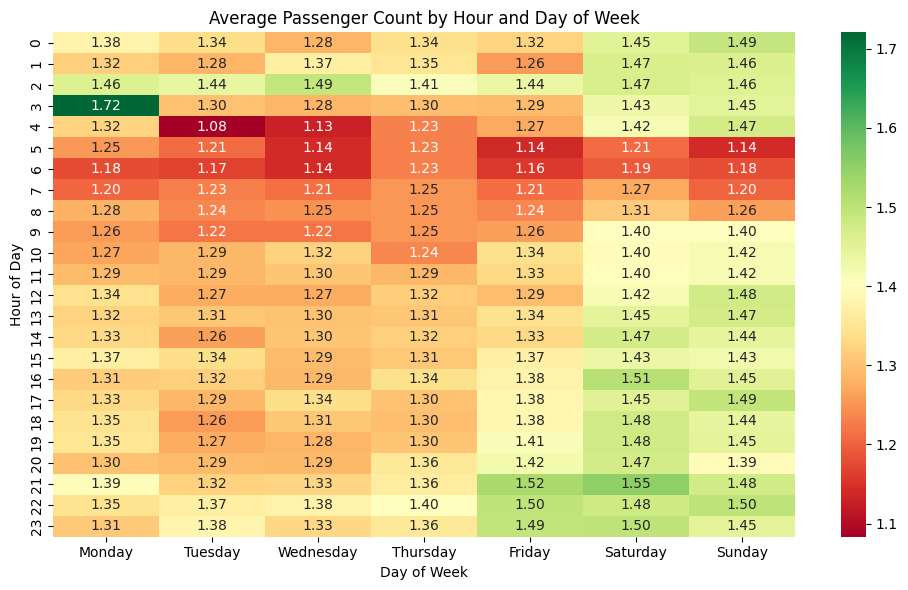

In [1131]:
# See how passenger count varies across hours and days

# Ensure datetime fields are parsed
#non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'], errors='coerce')
non_zero_df['day_of_week'] = non_zero_df['tpep_pickup_datetime'].dt.day_name()

# Group by day and hour to get average passenger count
passenger_variation = non_zero_df.groupby(['day_of_week', 'pickup_hour'])['passenger_count'].mean().reset_index()

# Order days of the week for clarity
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_variation['day_of_week'] = pd.Categorical(passenger_variation['day_of_week'], categories=day_order, ordered=True)
passenger_variation = passenger_variation.sort_values(['day_of_week', 'pickup_hour'])

# Pivot for heatmap-like structure
passenger_heatmap = passenger_variation.pivot(index='pickup_hour', columns='day_of_week', values='passenger_count')

plt.figure(figsize=(10, 6))
sns.heatmap(passenger_heatmap, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1133]:
# How does passenger count vary across zones

# Group by pickup zone and calculate average passenger count
zone_passenger_counts = non_zero_df.groupby('pickup_zone')['passenger_count'].mean().reset_index()
zone_passenger_counts.columns = ['Pickup Zone', 'Average Passenger Count']
zone_passenger_counts = zone_passenger_counts.sort_values(by='Average Passenger Count', ascending=False)

In [1148]:
zone_passenger_counts.head(20)

Pickup Zone  Average Passenger Count
26                   East Elmhurst                 3.000000
3                     Battery Park                 1.673913
12                 Carroll Gardens                 1.571429
102      Williamsburg (South Side)                 1.533333
60                 Lower East Side                 1.474052
16                       Chinatown                 1.455621
64   Meatpacking/West Village West                 1.452163
104             World Trade Center                 1.450147
57             Little Italy/NoLiTa                 1.443887
15                    Central Park                 1.436344
88       Times Sq/Theatre District                 1.417082
99       West Chelsea/Hudson Yards                 1.415000
45         Greenwich Village South                 1.408831
0                    Alphabet City                 1.404255
69             Morningside Heights                 1.401028
4                Battery Park City                 1.398559
82                            SoHo                 1.394992
100                   West Village                 1.391783
25                    East Chelsea                 1.390697
68                   Midtown South                 1.387682

In [1140]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Compute average passenger count per zone
avg_passenger_per_zone = non_zero_df.groupby('pickup_zone')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.columns = ['zone', 'Average Passenger Count']

# Merge in the average passenger count
zones = zones.merge(avg_passenger_per_zone, on='zone', how='left')

# Fill missing values with 0 for zones without trips
zones['Average Passenger Count'] = zones['Average Passenger Count'].fillna(0)

In [1144]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Total Trips  Average Passenger Count  
0          0.0                 0.000000  
1          0.0                 0.000000  
2          0.0                 0.000000  
3        589.0                 1.404255  
4          0.0                 0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [1150]:
# How often is each surcharge applied?

# Check where surcharges are applied (values greater than zero)
non_zero_df['has_surcharge'] = (non_zero_df['congestion_surcharge'] > 0).astype(int)

# Group by pickup and dropoff zones to count frequency of surcharges
pickup_surcharge_freq = non_zero_df.groupby('pickup_zone')['has_surcharge'].mean().reset_index()
pickup_surcharge_freq.columns = ['Pickup Zone', 'Surcharge Frequency (Pickup)']
pickup_surcharge_freq = pickup_surcharge_freq.sort_values(by='Surcharge Frequency (Pickup)', ascending=False)

dropoff_surcharge_freq = non_zero_df.groupby('dropoff_zone')['has_surcharge'].mean().reset_index()
dropoff_surcharge_freq.columns = ['Dropoff Zone', 'Surcharge Frequency (Dropoff)']
dropoff_surcharge_freq = dropoff_surcharge_freq.sort_values(by='Surcharge Frequency (Dropoff)', ascending=False)

# Surcharge by hour
non_zero_df['surcharge_hour'] = non_zero_df['pickup_hour']
hourly_surcharge_freq = non_zero_df.groupby('surcharge_hour')['has_surcharge'].mean().reset_index()
hourly_surcharge_freq.columns = ['Hour of Day', 'Surcharge Frequency']

In [1166]:
hourly_surcharge_freq.head()

Hour of Day  Surcharge Frequency
0            0                  1.0
1            1                  1.0
2            2                  1.0
3            3                  1.0
4            4                  1.0

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### NYC Taxi Demand Pattern & Operational Inefficiencies 
1. Time-Based Patterns:
- Peak traffic occurs at 6 PM on weekdays, particularly Fridays.
- Weekends have consistent demand, while weekdays show pronounced rush hour peaks.
- Tips are more generous at night, especially for shorter trips.
Strategy: Align driver shifts with peak demand hours and reward night shifts in nightlife zones

2. Location-Based Demand:
- High-traffic zones: Midtown, JFK, Upper East Side, Financial District.
- Surcharges appear frequently in Lower Manhattan.
Strategy: Use historical demand to pre-position taxis and minimize idle time

3. Passenger Behavior:
- Most trips have 1 passenger and are under 3 miles.
- Higher tip percentages occur on shorter trips with lower fares.
Strategy: Improve service for short trips and educate drivers about high-tipping opportunities.

4. Operational Inefficiencies:
- Nighttime surcharges show potential routing inefficiencies.
- Some corridors show consistently slow average speeds.
Strategy: Avoid known bottlenecks using historic speed data and apply smart routing techniques.

5. Summary Recommendations:
- Time: Prioritize 6-9 PM (weekdays) and 10 PM-2 AM (weekends).
- Location: Focus on high-traffic pickup zones and nightlife areas.
- Dispatch: Use live demand maps for dynamic taxi assignments.
- Routing: Avoid slow corridors during peak hours using smart routing tools.
- Tips: Promote customer service during short rides where tip percentages are highest.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Strategic Cab Positioning by Zone, Time, and Day

To meet fluctuating demand effectively, taxi fleets should be dynamically allocated based on location, time of
day, and day of the week. Predictive heatmaps and historical trip data reveal:

- Morning (6-10 AM): Midtown, Financial District, Upper East Side (Weekdays); Airports and Queens
(Weekends)
- Midday (12-2 PM): Business and shopping hubs like Midtown, Tribeca, SOHO
- Evening (5-8 PM): Residential-to-downtown corridors on weekdays; Entertainment zones on weekends
- Night (10 PM-2 AM): East/West Village, Chelsea, Brooklyn hot zones (weekend nightlife)
Tactics:
- Use predictive standby zones for idle cabs
- Incorporate public event data and weather forecasts into dispatch logic
- Promote driver reallocation using real-time demand alerts

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Data-Driven Pricing Optimization Strategies

Fare structure can be adjusted using fare-per-mile analysis and rider behavior:
- Short Trips (0-3 miles): High yield per mile; maintain base fares and highlight convenience
- Long Trips (5+ miles): Lower fare-per-mile; introduce slight distance-based surcharges
- Nighttime Hours: High tip behavior; modest surcharges recommended
- Congested Zones: Time-based fare modulation; off-peak discounts can stimulate demand
Additional Suggestions:
- Offer personalized ride incentives based on rider profiles
- Consider transparent flat rates for airport rides and peak corridors
- Present cost-saving insights in-app or on receipts to enhance loyalty